# Case Study 1 - Classification

## Aashish Tangnami 


Dataset : who_data.csv

Objective:
- What are the different factors that influence the income of an individual?
- To build a prediction model that can help the government formulate policies for the right pockets of the society. Use Logistic Regression and SVM. 
- Check the criteria for logistic regression and compare the results with SVM


In [1]:
# It removes all the warnings and depreciated warnings.
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Data Manipulation 

import pandas as pd
import numpy as np

# Data Visualization 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# importing dataset as raw_data
raw_data = pd.read_csv('/content/who_data.csv')

In [4]:
raw_data.head(6)

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States,<=50K


In [5]:
# raw data information about its data type and value counts.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   race                    32561 non-null  object
 8   sex                     32561 non-null  object
 9   capital gain            32561 non-null  int64 
 10  capital loss            32561 non-null  int64 
 11  working hours per week  32561 non-null  int64 
 12  native-country          32561 non-null  object
 13  salary                  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


Observations:
- There are total 32561 row values, where as no null values are detected.
- Data type (dtype) with integer are only 6 features : Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week.
- Rest of the 8 features are object dtypes.

In [6]:
# statistical analysis of the raw_data.
cmsd_analysis = raw_data.describe()

In [7]:
# transposing the data.
cmsd_analysis.T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-no. of years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working hours per week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Obervations:

1. Average age is 37 while minimum and maximum age of people in the dataset is 19 and 90 years respectively.
2. Most of the people on record has studied 10 years in average while minimum and maximum years spent on education is 1 and 16 respectively.
3. People with minimum capital gain of 0 and maximum gain of 99999 for the range of age 19-90 seems odd. 
4. The number of hours spent per week varies between 1 to 99 and the average being 40 hours which also seems odd. 

We can assume but not conclude that there is error in data collection.

In [8]:
# printing the values of the object datatypes.

print('workclass',raw_data.workclass.unique())
print('education',raw_data.education.unique())
print('marital status',raw_data['marital status'].unique())
print('occupation',raw_data.occupation.unique())
print('race',raw_data.race.unique())
print('gender',raw_data.sex.unique())
print('native-country',raw_data['native-country'].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
gender [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 '

Observations:
1. We can see feature value '?' in three different columns: workclass, occupation and native-country.
2. The '?' value should be either dropped or replaced with some values or transformed.

We are observing the Model with data by droping such values and transforming them.



In [9]:
# cloning the raw_data into cloned_raw_data for future use before droping nan values.
cloned_raw_data = raw_data.copy()

# replacing the values of ? with nan 
raw_data['workclass'] = raw_data['workclass'].replace(' ?',np.nan)
raw_data['occupation'] = raw_data['occupation'].replace(' ?',np.nan)
raw_data['native-country'] = raw_data['native-country'].replace(' ?',np.nan)

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               30725 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              30718 non-null  object
 7   race                    32561 non-null  object
 8   sex                     32561 non-null  object
 9   capital gain            32561 non-null  int64 
 10  capital loss            32561 non-null  int64 
 11  working hours per week  32561 non-null  int64 
 12  native-country          31978 non-null  object
 13  salary                  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [11]:
# droping the Nan values.
raw_data = raw_data.dropna(axis=0)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30162 non-null  int64 
 1   workclass               30162 non-null  object
 2   fnlwgt                  30162 non-null  int64 
 3   education               30162 non-null  object
 4   education-no. of years  30162 non-null  int64 
 5   marital status          30162 non-null  object
 6   occupation              30162 non-null  object
 7   race                    30162 non-null  object
 8   sex                     30162 non-null  object
 9   capital gain            30162 non-null  int64 
 10  capital loss            30162 non-null  int64 
 11  working hours per week  30162 non-null  int64 
 12  native-country          30162 non-null  object
 13  salary                  30162 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [12]:
# Statistic analysis 
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education-no. of years,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
capital gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0
capital loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0
working hours per week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0


# Visualization

#### Since we have many features labelled "?" with many value counts. We cannot be sure to drop all the values for these feaures.  Thus, we will be exploring and analyzing the dataset feature sets "?" with Logistic regression and SVM respectively.

In [13]:
# correlation of the integer values from the raw data.
correlation = raw_data.corr()

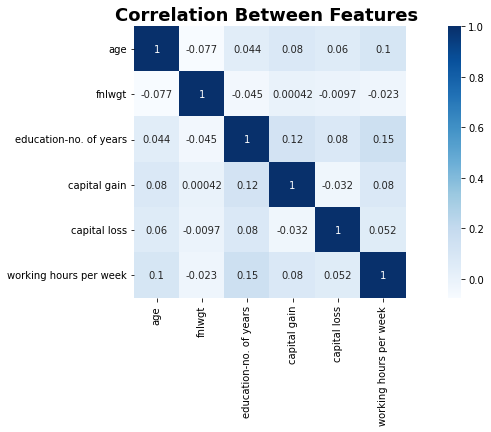

In [14]:
# ploting the graph of size 15x5
plt.figure(figsize=(15,5))

# using heat map to show correlation
sns.heatmap(correlation,
            data = raw_data, 
            annot=True, 
            square=True,
            cmap='Blues')
plt.title("Correlation Between Features ",fontsize=18, fontweight='bold')
plt.show()

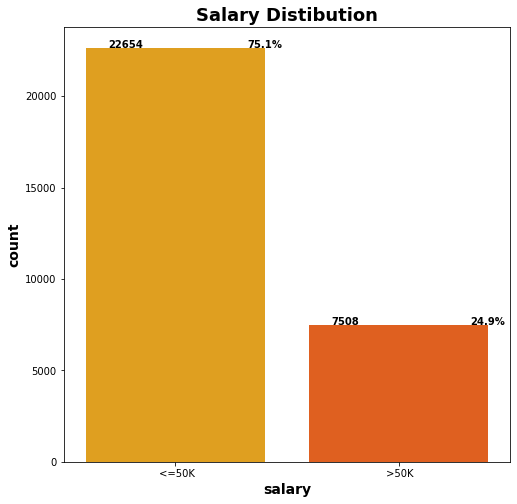

In [15]:
# Ploting the salary distribution which is greater than 50k and less than or equal to 50k

plt.figure(figsize=(8,8))
plt.title('Salary Distibution',
          fontsize = 18,
          fontweight = 'bold')

plt.xlabel('Salary',
           fontsize = 14,
           fontweight = 'bold')

plt.ylabel('Count',
           fontsize=14,
           fontweight='bold')
ax = sns.countplot(x = raw_data["salary"], 
                   palette='autumn_r')
total=len(raw_data)

for p in ax.patches:
    x = p.get_x() + p.get_width()
    y = p.get_height() + 10
    ax.annotate('{:}'.format(p.get_height()),
                (p.get_x() + 0.1, 
                 p.get_height() + 10),
                fontweight='bold')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax.annotate(percentage, (x, y),
                ha='center',
                fontweight='bold')

Observations:
1. 24.9% of total people in the dataset has more income than 50K annually ranging between 50K-99999.
2. 75% of total individual has less than 50K annually ranging between 0-50K


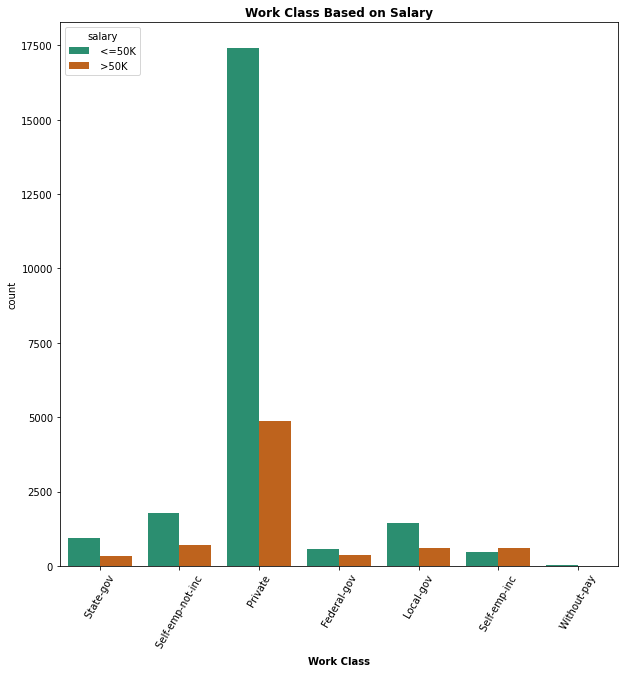

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'workclass', 
              hue = 'salary', 
              data = raw_data, 
              palette = 'Dark2')
plt.title('Work Class Based on Salary',fontweight='bold')
plt.xlabel('Work Class',fontweight='bold')
plt.xticks(rotation=60)
plt.show()

Observations:

1. People who are employed in Private sector are highly paid for both with more than 50K and less than 50K annually.
2. Self employed non inc and local-gov work class has almost similary salary range where as self-employ-inc and federal-gov work class has similar salary range.


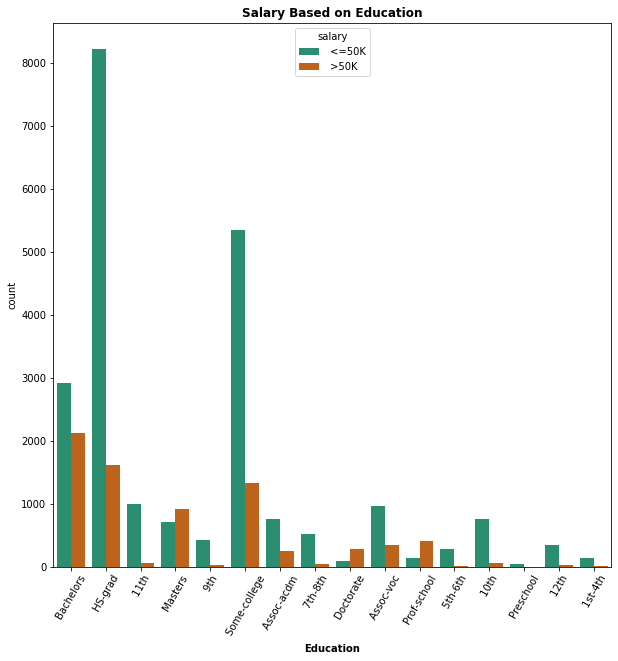

In [17]:

plt.figure(figsize=(10,10))
sns.countplot(x = 'education', 
              hue = 'salary', 
              data = raw_data,
              palette = 'Dark2')
plt.title('Salary Based on Education',fontweight='bold')
plt.xlabel('Education',fontweight='bold')
plt.xticks(rotation=60)
plt.show()

Observations:
1. 

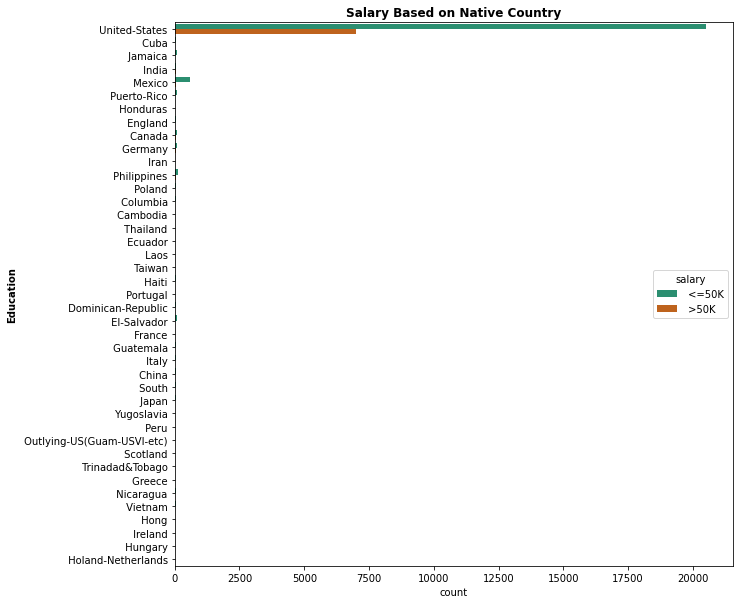

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(y = 'native-country', 
              hue = 'salary', 
              data = raw_data, 
              palette = 'Dark2')
plt.title('Salary Based on Native Country',fontweight='bold')
plt.ylabel('Education',fontweight='bold')
plt.show()

Observations:
1. Those people who are from USA are the ones earning most.
2. Similarly, Mexico has the second highest numbers of people who earns less than or equal to 50K annually.

From the above count plot we can see that the data collected is highly biased and is not distributed through out differnet countries.

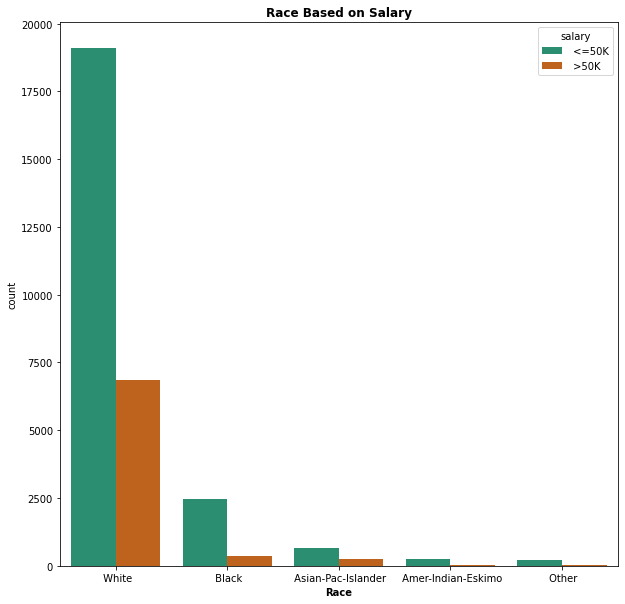

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'race', 
              hue = 'salary', 
              data = raw_data,
              palette ='Dark2')
plt.title('Race Based on Salary',fontweight='bold')
plt.xlabel('Race',fontweight='bold')
plt.show()

Observations:
1. According to data, White people are being paid higher salary than any other races.
2. Black people are second who has earning people of age group.


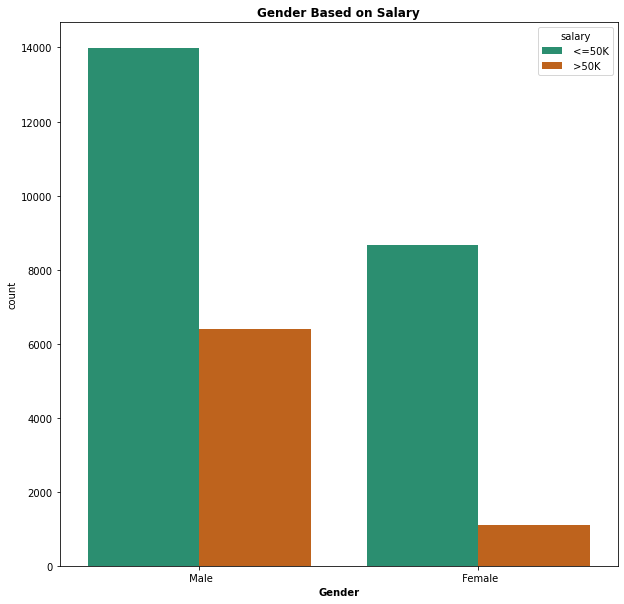

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'sex', 
              hue = 'salary', 
              data = raw_data,
              palette ='Dark2')
plt.title('Gender Based on Salary',fontweight = 'bold')
plt.xlabel('Gender',fontweight='bold')
plt.show()

Observations:
1. Male has higher number in terms of earning more salary than females.

(20.0, 60.0)

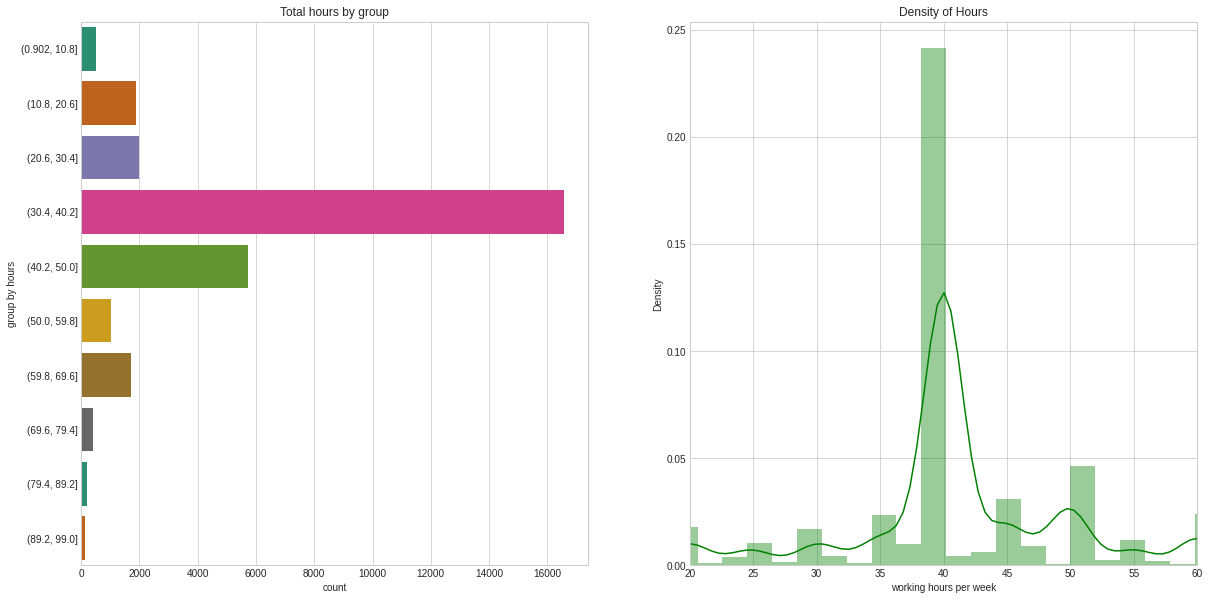

In [21]:
# segmenting and sorting hourly values into bins.
raw_data['group by hours'] = pd.cut(raw_data['working hours per week'], 10)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
plt.subplot(1, 2, 1)
sns.countplot(y = "group by hours", data = raw_data, palette = "Dark2")
plt.title('Total hours by group')

plt.subplot(1, 2, 2)
sns.distplot(raw_data['working hours per week'], color='Green')
sns.distplot(raw_data[raw_data['salary'] == '>50K']['working hours per week'], 
             kde_kws={"label": ">$50K"})
sns.distplot(raw_data[raw_data['salary'] == '<=50K']['working hours per week'], 
              kde_kws={"label": "<$50K"})
plt.title('Density of Hours')
plt.ylim(0, None)
plt.xlim(20, 60)

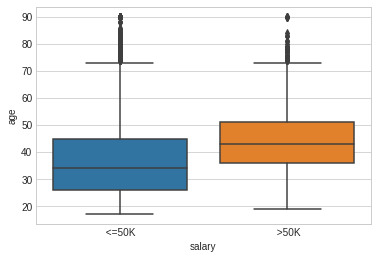

In [22]:
sns.boxplot(raw_data.salary, raw_data.age)

Observations:
1. There are lots of outliers in the age features.
2. People above 75 age are more likely to be outliers.
3. People ranging between 25-55 age group are the ones earning the most.

# Logistic Regression

Initially we are using logistic regression (LR) to see how robust our dataset is and how effictively LR can predict the dataset.

In [23]:
# importing libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


categorical_features = ['workclass','education-no. of years', 'marital status', 'occupation', 
              'race', 'sex','native-country']
# label encoder
label_encoder = LabelEncoder()

# encoding each categorical features.
for col in categorical_features:
    label_encoder.fit(raw_data[col])
    raw_data[col] = label_encoder.transform(raw_data[col])

# assigning observe values 
X = raw_data[['workclass','education-no. of years', 'marital status', 'occupation', 
              'race', 'sex','native-country', 'age', 'fnlwgt', 'capital gain', 'capital loss', 'working hours per week']]
# target value
y = raw_data['salary']
    

#splitting the data set into Train, Test for both observed variables and target variables in 60-40 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)



In [24]:
# raw_data after label encoding.
raw_data

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary,group by hours
0,39,5,77516,Bachelors,12,4,0,4,1,2174,0,40,38,<=50K,"(30.4, 40.2]"
1,50,4,83311,Bachelors,12,2,3,4,1,0,0,13,38,<=50K,"(10.8, 20.6]"
2,38,2,215646,HS-grad,8,0,5,4,1,0,0,40,38,<=50K,"(30.4, 40.2]"
3,53,2,234721,11th,6,2,5,2,1,0,0,40,38,<=50K,"(30.4, 40.2]"
4,28,2,338409,Bachelors,12,2,9,2,0,0,0,40,4,<=50K,"(30.4, 40.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,Assoc-acdm,11,2,12,4,0,0,0,38,38,<=50K,"(30.4, 40.2]"
32557,40,2,154374,HS-grad,8,2,6,4,1,0,0,40,38,>50K,"(30.4, 40.2]"
32558,58,2,151910,HS-grad,8,6,0,4,0,0,0,40,38,<=50K,"(30.4, 40.2]"
32559,22,2,201490,HS-grad,8,4,0,4,1,0,0,20,38,<=50K,"(10.8, 20.6]"


In [25]:
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()

# scaling train and test data.
x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
x_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)


In [26]:
# importing Models for classification.
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve


# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
Y_pred = log_reg.predict(x_test)
acc = accuracy_score(y_test, Y_pred)

print("Accuracy of the Model Logistic Regression : ", round(acc * 100, 2), "%")


Accuracy of the Model Logistic Regression :  81.28 %


In [27]:
# Support Vector Classifier (SVM/SVC)

svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
score_svc = svc.score(X_test,y_test)
print("Accuracy of the Model Support Vector Classifier : ", round(score_svc * 100, 2), "%")

Accuracy of the Model Support Vector Classifier :  74.95 %


## Observation

1. We have 81% of accuracy score using logistic regression with the raw data after removing the unknown features.
2. Using Support Vector Classifier we have got 75% of accuracy score.

# Analysis with all features.

We have observed model accuracy again using all the features by extending them using dummies.

In [28]:
# droping fnlwgt feature since it has no such significance for salary.
cloned_raw_data = cloned_raw_data.drop(['fnlwgt'], axis=1) 

In [29]:
# Dropping the salary values
x = cloned_raw_data.drop(['salary'], axis=1)

In [30]:
# We are converting the target variable salary into numeric(binary)  
cloned_raw_data.salary = cloned_raw_data.salary.replace([' <=50K', ' >50K'],[0,1])

In [31]:
# extracting only features with dtype object poping them.
numeric_col_feature = list(cloned_raw_data.select_dtypes(exclude='object').columns)
numeric_col_feature.pop()
numeric_col_feature

['age',
 'education-no. of years',
 'capital gain',
 'capital loss',
 'working hours per week']

In [32]:
# Converting categorical variable into dummy/indicator variables.
x = pd.get_dummies(x)

In [33]:
# scaling to unit variance
scaled_unit_value = StandardScaler()
x[numeric_col_feature] = scaled_unit_value.fit_transform(x[numeric_col_feature])

In [34]:
# assigning target variable as y
y = cloned_raw_data.salary

In [35]:
# splitting train test data.
x_train,x_test,y_trian,y_test=train_test_split(x,y,random_state=89,test_size=0.3)

### Logistic Regression Model Implementation
 

In [36]:
Model_LR = LogisticRegression()

In [37]:
Model_LR.fit(x_train,y_trian)

LogisticRegression()

In [38]:
y_predict_LR = Model_LR.predict(x_test)

In [39]:
score = accuracy_score(y_test, y_predict_LR)
print("Accuracy of the Model Logistic Regression : ", round(score * 100, 2), "%")

Accuracy of the Model Logistic Regression :  84.67 %


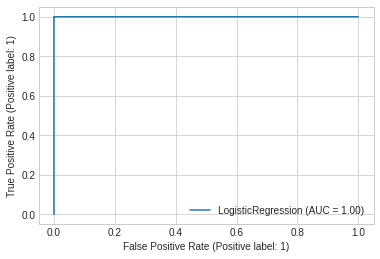

In [40]:
# plotting roc curve for Linear Regression model.
plot_roc_curve(Model_LR, x_test, y_predict_LR)

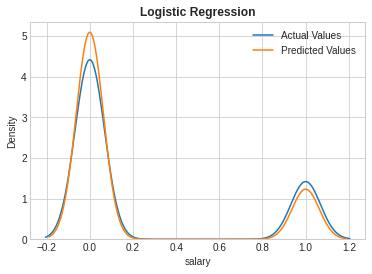

In [41]:
ax=sns.distplot(y_test, 
                hist=False,
                label='Actual Values')
ax=sns.distplot(y_predict_LR, 
                hist=False,
                label='Predicted Values')
ax.set_title('Logistic Regression', fontweight='bold')
plt.legend()

Observations:
1. We can see that there is no much difference in actual values and predicted values by the model Logisitc Regression.

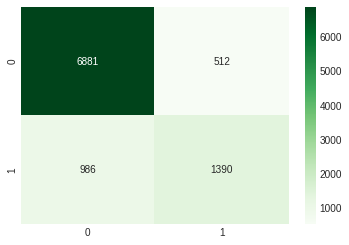

In [42]:
sns.heatmap(confusion_matrix(y_test,
                             y_predict_LR),
            annot=True,
            cmap='Greens',fmt='g')

### SVM Model Implementation

In [43]:
Model_SVC = SVC()

In [44]:
Model_SVC.fit(x_train,y_trian)
Model_SVC.score(x_test,y_test)

0.8534138601699253

In [45]:
y_predic_SVC = Model_SVC.predict(x_test)

In [46]:
accuracy_score(y_test, y_predic_SVC)

0.8534138601699253

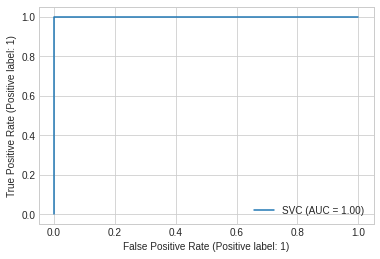

In [47]:
plot_roc_curve(Model_SVC, x_test, y_predic_SVC)

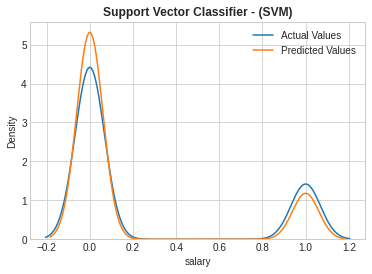

In [48]:
ax=sns.distplot(y_test,
                hist=False,
                label='Actual Values')
ax=sns.distplot(y_predic_SVC,
                hist=False,
                label='Predicted Values')
ax.set_title('Support Vector Classifier - (SVM)',fontweight='bold')
plt.legend()

Observations:
1. We can see that there is no much difference in actual values and predicted values by the model SVC.

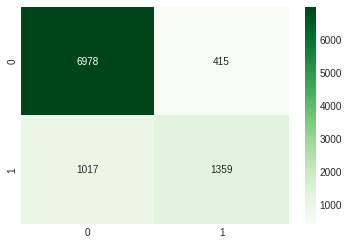

In [49]:
# confusion matrix for SVC.
sns.heatmap(confusion_matrix(y_test,y_predic_SVC), 
            annot = True, 
            cmap = 'Greens',
            fmt='g')

# Conclusion

We observed following scores:

1st Observation:
- Logistic Regression - 81 %
- SVC - 74 %

2nd Observation:
- Logistic Regression - 84 %
- SVC - 85 %

1. Age is the most important factor that has most effect on salary.

Even though ROC curve for both logistic Regression and SVC is same the accuracy score and as seen in confusion matrix SVC has better performance.

2. As we have seen that the accuracy score by SVC is more than 1% better than Logistic Regression, We suggest to use SVC over logistic Regression for further prediction.

3. We tried to use both models SVC and Logistic Regression for the dataset by removing the unknown features and extending features.



## REFERENCES
1. kaggle.com. (n.d.). Adult Income Dataset | From Scratch. [online] Available at: https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch [Accessed 28 Oct. 2022].

2. kaggle.com. (n.d.). Income Classification Model. [online] Available at: https://www.kaggle.com/code/jieyima/income-classification-model.
‌
‌3. kaggle.com. (n.d.). SVM model for adult income. [online] Available at: https://www.kaggle.com/code/yatindeshpande/svm-model-for-adult-income [Accessed 27 Oct. 2022].
‌
4. kaggle.com. (n.d.). KNN and Logistic Regression. [online] Available at: https://www.kaggle.com/code/vaishnavi28krishna/knn-and-logistic-regression [Accessed 30 Oct. 2022].
‌
5. kaggle.com. (n.d.). 85% Accuracy using Random Forest, SVM and KNN. [online] Available at: https://www.kaggle.com/code/abdulhaq786/85-accuracy-using-random-forest-svm-and-knn#Feature-Selection [Accessed 31 Oct. 2022].
‌